# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import timeit 
import seaborn as sns
import plotly.express as px
import requests as req
import matplotlib.gridspec as gridspec
import requests
import warnings
from io import BytesIO
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import norm
from plotly import graph_objects as go

ALPHA = 0.05
warnings.simplefilter("ignore")

# Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.


Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.


Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

# Описание данных

Каждая запись в логе — это действие пользователя, или событие.

    EventName — название события;
    DeviceIDHash — уникальный идентификатор пользователя;
    EventTimestamp — время события;
    ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.


# Шаги по выполнению проекта
## [Шаг 1. Откройте файл с данными и изучите общую информацию](#section_I)
* Путь к файлу: /datasets/logs_exp.csv

## [Шаг 2. Подготовьте данные](#section_II)

* [Замените названия столбцов на удобные для вас;](#section_11)
*  [Проверьте пропуски и типы данных. Откорректируйте, если нужно;](#section_12)
* [Добавьте столбец даты и времени, а также отдельный столбец дат;](#section_13)

## [Шаг 3. Изучите и проверьте данные](#section_III)

 *  [Сколько всего событий в логе?](#section_21)
 * [Сколько всего пользователей в логе?](#section_22)
 *   [Сколько в среднем событий приходится на пользователя?](#section_23)
 *   [Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?](#section_24)
 *   [Много ли событий и пользователей вы потеряли, отбросив старые данные?](#section_25)
 *    [Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.](#section_26)

## [Шаг 4. Изучите воронку событий](#section_IV)

*     [Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.](#section_31)
*   [Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.](#section_32)
*   [Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.](#section_33)
*    [По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.](#section_34)
*   [На каком шаге теряете больше всего пользователей?](#section_35)
*   [Какая доля пользователей доходит от первого события до оплаты?](#section_36)

## [Шаг 5. Изучите результаты эксперимента](#section_V)

  *   [Сколько пользователей в каждой экспериментальной группе?](#section_41)
  *   [Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов.](#section_42)
  *   [Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.](#section_43)
  *   [Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным.](#section_44)
  *  [Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?](#section_45)
  *  [Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?](#section_46)
  *  [Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.](#section_47)
  
## [Шаг 6. Выводы](#section_VI)

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Хорошее начало проекта!
</div>

# Шаг 1. Откройте файл с данными и изучите общую информацию <a id='section_I'></a>

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


# Шаг 2. Подготовьте данные <a id='section_II'></a>

## Замените названия столбцов на удобные для вас <a id='section_11'></a>

In [3]:
df = df.rename(columns={'EventName':'name_event',
                   'DeviceIDHash':'id',
                   'EventTimestamp':'time_event',
                   'ExpId':'id_exper',})

## Проверьте пропуски и типы данных. Откорректируйте, если нужно<a id='section_12'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
name_event    244126 non-null object
id            244126 non-null int64
time_event    244126 non-null int64
id_exper      244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Все данные заполнены и имеют корректный тип

## Проверим данные на наличие дубликатов

In [5]:
df.duplicated().sum()

413

Удалим дубликаты в датасете

In [6]:
df = df.drop_duplicates()

## Добавьте столбец даты и времени, а также отдельный столбец дат<a id='section_13'></a>

Вычислим дату

In [7]:
df['time_event_date'] = pd.to_datetime(df['time_event'], unit='s')

Выделим стобец с датами

In [8]:
df['date_event'] = df['time_event_date'].dt.date

In [9]:
df.tail()

,name_event,id,time_event,id_exper,time_event_date,date_event
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07
244125,OffersScreenAppear,5746969938801999050,1565212517,246,2019-08-07 21:15:17,2019-08-07


Данные имели не самые удобные названия столбцов, которые были заменены на более понятные. Типы данных столбцов соответствовали своему наполнению. При проверке данных, было обнаружено 413 повторов. Вероятно, с ошибками сбора данных и возможной повторной записи одних тех же данных. Повторы были удалены, чтобы они не влияли на рещультат анализа. 
Подготовлены данные по датам событий вычисленных из стобца time_event.

# Шаг 3. Изучите и проверьте данные <a id='section_III'></a>

## Сколько всего событий в логе?<a id='section_21'></a>

Качественно выделяются пять событий

In [10]:
df['name_event'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: name_event, dtype: int64

Посчитаем общеее количество событий во всех качественных группах событий

In [11]:
len_df_native = len(df)
len_df_native

243713

## Сколько всего пользователей в логе?<a id='section_22'></a>

Посчитаем количество уникальных пользователей в логе:

In [12]:
number_users_native = df['id'].nunique()
number_users_native

7551

## Сколько в среднем событий приходится на пользователя?<a id='section_23'></a>

Сгруппируем данные по уникальным пользователям и посчитаем количество событий на каждого пользователя.
Оценим показатели среднее арифметическое и медиану

In [13]:
df.groupby(by='id').agg({'name_event':'count'}).mean()

name_event    32.275593
dtype: float64

In [14]:
df.groupby(by='id').agg({'name_event':'count'}).median()

name_event    20.0
dtype: float64

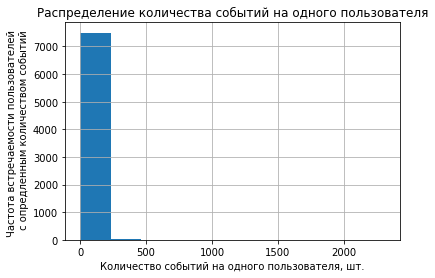

In [15]:
plot_mean_anme_event = df.groupby(by='id').agg({'name_event':'count'}).hist();
plt.xlabel('Количество событий на одного пользователя, шт.')
plt.ylabel('Частота встречаемости пользователей \n с опредленным количеством событий')
plt.title('Распределение количества событий на одного пользователя');

Как видно из показателей и графика, распредление количества событий на одного пользователя смещено вправо. Большинство не совершаеет более 250 событий.

## Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?<a id='section_24'></a>

Уникальны

Расчитаем границы периода

Начальная дата

In [16]:
df['time_event_date'].min()


Timestamp('2019-07-25 04:43:36')

Конечная дата

In [17]:
df['time_event_date'].max()

Timestamp('2019-08-07 21:15:17')

Период

In [18]:
df['time_event_date'].max() - df['time_event_date'].min()

Timedelta('13 days 16:31:41')

Посмотрим распределение активности клиентов во времени эксперимента

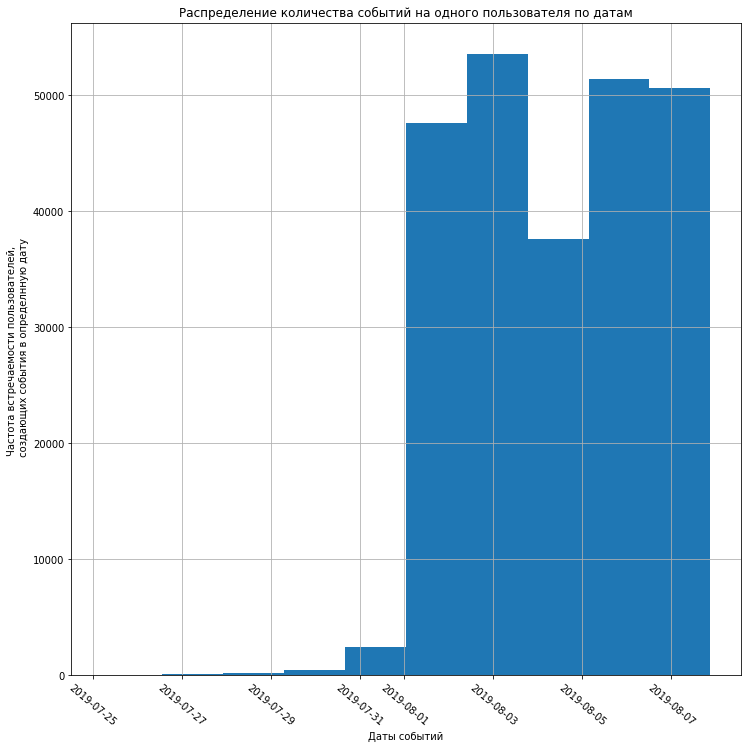

In [19]:
df['time_event_date'].hist(figsize=(12,12), );
plt.xlabel('Даты событий')
plt.xticks(rotation=-40)
plt.ylabel('Частота встречаемости пользователей, \n создающих события в определнную дату')
plt.title('Распределение количества событий на одного пользователя по датам');

Видно, что с 1-го августа происходит скачок данных. с этого момента данных становится значительно больше, следовательно они более полны их и будем использовать для анализа. 

Выделим даннные после первого августа

In [20]:
df = df.query('time_event_date >= "2019-08-01 00:00:00"')

In [21]:
df.head()

,name_event,id,time_event,id_exper,time_event_date,date_event
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


## Много ли событий и пользователей вы потеряли, отбросив старые данные?<a id='section_25'></a>

In [22]:
len_df_now = len(df)
len_df_native - len_df_now

2826

In [23]:
((len_df_native - len_df_now) / len_df_native) * 100

1.159560630741897

Потери составят 2828 логов, что составит всего один процент от первоначального датасета

Количество пользователей после удаления данных:

In [24]:
number_users_now = df['id'].nunique()
number_users_now

7534

Количество пользователей до удаления данных:

In [25]:
number_users_native

7551

Количество пользователей удаленных:

In [26]:
number_users_native - number_users_now

17

Различие в количестве составит:

In [27]:
round(((number_users_native - number_users_now) / number_users_native) * 100, 2)

0.23

При отбросе данных потеряем 17 пользователей, что составит всего 0.23% от всей выборки.

Срез данных позволит избавится от данных, неадекватно влияющих на анализ и при этом потери составят в назначительную часть датасета (количество событий - 1%, количество пользователей - 0.23%)

## Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.<a id='section_26'></a>

In [28]:
value_counts_count_id  = df.groupby(by='id_exper').agg({'id':'nunique'}).reset_index()
value_counts_count_id

,id_exper,id
0,246,2484
1,247,2513
2,248,2537


In [29]:
value_counts_count_id_exper = df['id_exper'].value_counts().reset_index()
value_counts_count_id_exper

,index,id_exper
0,248,84563
1,246,79302
2,247,77022


In [30]:
value_counts_count = value_counts_count_id_exper.merge(value_counts_count_id, left_on='index', right_on='id_exper', how='outer')
value_counts_count = value_counts_count.drop('id_exper_y', axis=1)

In [31]:
value_counts_count = (value_counts_count
                      .rename(columns = {'index':'id_exper',
                                         'id_exper_x':'number_events',
                                         'id':'number_users'}))
value_counts_count

,id_exper,number_events,number_users
0,248,84563,2537
1,246,79302,2484
2,247,77022,2513


Проверим различие между группами по количеству событий

In [32]:
((value_counts_count.loc[0, 'number_events'] - value_counts_count.loc[1, 'number_events']) 
 / value_counts_count.loc[0, 'number_events'])

0.062213970649101856

In [33]:
((value_counts_count.loc[0, 'number_events'] - value_counts_count.loc[2, 'number_events']) 
 / value_counts_count.loc[0, 'number_events'])

0.08917611721438454

In [34]:
((value_counts_count.loc[1, 'number_events'] - value_counts_count.loc[2, 'number_events']) 
 / value_counts_count.loc[1, 'number_events'])

0.028750851176515095

Проверим различие между группами по количеству пользователей

In [35]:
((value_counts_count.loc[0, 'number_users'] - value_counts_count.loc[1, 'number_users']) 
 / value_counts_count.loc[0, 'number_users'])

0.02089081592432006

In [36]:
((value_counts_count.loc[0, 'number_users'] - value_counts_count.loc[2, 'number_users']) 
 / value_counts_count.loc[0, 'number_users'])

0.009459992116673236

In [37]:
((value_counts_count.loc[1, 'number_users'] - value_counts_count.loc[2, 'number_users']) 
 / value_counts_count.loc[1, 'number_users'])

-0.011674718196457327

Все три группы представлены в данных, и имеют сходный уровень представленности. Что говорит об адекватом выполнении теста и возможности использования данных далее в анализе. Количество событий и количество пользователей находится на сходном уровне и различаются менее чем на десятую долю процента.

# Шаг 4. Изучите воронку событий <a id='section_IV'></a>

##  Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.<a id='section_31'></a>

In [38]:
frequenz = df['name_event'].value_counts().reset_index()
frequenz['name_event'] = frequenz['name_event'] / len(df)
frequenz = frequenz.rename(columns = {'index':'name_event','name_event':'frequenz'})
frequenz


,name_event,frequenz
0,MainScreenAppear,0.487067
1,OffersScreenAppear,0.192343
2,CartScreenAppear,0.175613
3,PaymentScreenSuccessful,0.140805
4,Tutorial,0.004172


## Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.<a id='section_32'></a>

In [39]:
number_users = df.groupby(by='name_event').agg({'id':'nunique'}).reset_index()
number_users = number_users.sort_values(by= 'id', ascending=False)
number_users = number_users.rename(columns={'id':'number'})
number_users = number_users.reset_index()
number_users = number_users.drop(['index'], axis=1)

number_users


,name_event,number
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


Переместим руководство на первое место, т.к. по логиче оно должно быть первым событием, при работе с приложением.

In [40]:
number_users_chan = number_users
number_users_chan.index = [1, 2, 3, 4, 0]
number_users_chan = number_users_chan.sort_index()
number_users_chan

,name_event,number
0,Tutorial,840
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
3,CartScreenAppear,3734
4,PaymentScreenSuccessful,3539


По логике событий руководство пользователи должны проходить первым ,но исходя и полученной воронки так делает меньшинство. Вероятно, это связано, с тем, что руководством пользуются только новые пользватели,которые в последующем не нуждаются в повторном изучении руководства.Поэтому, стоит не учитывать это событие, исключив влияние его на всю остальную воронку.

##### Посчитаем количество уникальных пользователей и количество уникальных пользователей совершивших события хоть раз. И высчитаем долю таки пользователей

In [41]:
users_event_count = df.groupby(by='id').agg({'name_event':'count'}).reset_index()['id'].nunique()

In [42]:
users_event_mor0 = df.groupby(by='id').agg({'name_event':'count'}).reset_index()
users_event_mor0 = users_event_mor0[users_event_mor0['name_event'] > 0] 
users_event_mor0_count = users_event_mor0['id'].nunique()


In [43]:
users_event_mor0_count / users_event_count

1.0

Все пользователи совершили хотя бы одно событие.

## Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.<a id='section_33'></a>

Исходя из полученных данных в пункте выше, можно предположить следующую последовательность событий:

Запуск главного экрана -> Экран предложения -> Экран корзины -> Экран оплаты

## По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.<a id='section_34'></a>

Простая воронка

In [44]:
for i in range(1,len(number_users)):
    j =  i - 1
    number_users.loc[i,'part_transition'] = (number_users.loc[i,'number'] / 
                                             number_users.loc[j,'number'])

number_users

,name_event,number,part_transition
1,MainScreenAppear,7419,8.832143
2,OffersScreenAppear,4593,0.619086
3,CartScreenAppear,3734,0.812976
4,PaymentScreenSuccessful,3539,0.947777
0,Tutorial,840,NaN


Воронка с учётом последовательности шагов

In [45]:
df.head()

,name_event,id,time_event,id_exper,time_event_date,date_event
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


Сгруппируем события по клиентам

In [46]:
users = df.pivot_table(
        index='id', 
        columns='name_event', 
        values='time_event_date',
        aggfunc='min')
users.head()

name_event,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
id,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT


Расчитаем количество людей перешедших по предполагаемой воронке

In [47]:
step_I = ~users['MainScreenAppear'].isna()
step_II = step_I & (users['MainScreenAppear'] > users['OffersScreenAppear'])
step_III = step_II & (users['OffersScreenAppear'] > users['CartScreenAppear'])
step_IV = step_III & (users['CartScreenAppear'] > users['PaymentScreenSuccessful'])
step_V = step_IV & (users['PaymentScreenSuccessful'] > users['Tutorial'])

n_mainscreen = users[step_I].shape[0]
n_offersscreen = users[step_II].shape[0]
n_cartscreen = users[step_III].shape[0]
n_paymentscreen = users[step_IV].shape[0]
n_tutorial = users[step_V].shape[0]

In [48]:
print('Руководство', n_tutorial)
print('Запуск главного экрана', n_mainscreen)
print('Экран предложения', n_offersscreen)
print('Экран корзины', n_cartscreen)
print('Экран оплаты', n_paymentscreen)



Руководство 0
Запуск главного экрана 7419
Экран предложения 280
Экран корзины 54
Экран оплаты 34


Объединим результаты в датасет и посчитаем доли переходов

In [49]:
value_number_users_order = {'name_event':
                            ['Запуск главного экрана',
                             'Экран предложения', 
                             'Экран корзины',
                             'Экран оплаты',
                             'Руководство'
                            ],
                            'number':
                            [n_mainscreen,
                             n_offersscreen,
                             n_cartscreen, 
                             n_paymentscreen,
                             n_tutorial]}
number_users_order = pd.DataFrame(data = value_number_users_order)
for i in range(1,len(number_users_order)):
    j =  i - 1
    number_users_order.loc[i,'part_transition'] = (number_users_order.loc[i,'number'] / 
                                             number_users_order.loc[j,'number'])
number_users_order

,name_event,number,part_transition
0,Запуск главного экрана,7419,NaN
1,Экран предложения,280,0.037741
2,Экран корзины,54,0.192857
3,Экран оплаты,34,0.629630
4,Руководство,0,0.000000


Сравним с полученную воронку с учетом шагов с простой продуктовой воронкой

In [50]:
number_users

,name_event,number,part_transition
1,MainScreenAppear,7419,8.832143
2,OffersScreenAppear,4593,0.619086
3,CartScreenAppear,3734,0.812976
4,PaymentScreenSuccessful,3539,0.947777
0,Tutorial,840,NaN


Вероятно, большинство переходов идут вне предполагаемой воронки, возможно это связано с прямыми переходами по ссылкам к нужному товару, либо оценка содержания корзины.
Большинство клиентов терятеся на уровне перехода от главной страницы к страницам с предложением покупки.

## На каком шаге теряете больше всего пользователей?<a id='section_35'></a>

Наибольшие потери происходят на шаге перехода от главной страницы к последующим частям сайта.

## Какая доля пользователей доходит от первого события до оплаты?<a id='section_36'></a>

In [51]:
(number_users.loc[3,'number'] / number_users.loc[0,'number']).round(3)

4.445

Согласно простой воронке 47,7%. Около 50% пользователей проходят от главного экрана до оплаты заказа, т.е. 3539 пользователей, что говорит о высокой доле переодов и оптимальной работе приложения.

# Шаг 5. Изучите результаты эксперимента <a id='section_V'></a>

## Сколько пользователей в каждой экспериментальной группе?<a id='section_41'></a>

In [52]:
number_users_group=df.groupby(by='id_exper').agg({'id':'nunique'}).reset_index()
number_users_group

,id_exper,id
0,246,2484
1,247,2513
2,248,2537


В каждой группе присутсвует примерно равное количество людей, около 2500.

In [53]:
((number_users_group.loc[1, 'id'] / number_users_group.loc[0, 'id'])-1)*100

1.1674718196457379

Различие в контрольных группах по количеству пользователей составляет около 1%.

## Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. <a id='section_42'></a> Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.<a id='section_43'></a>

## Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. <a id='section_44'></a>

In [54]:
group_246 = df.query('id_exper == 246')
group_247 = df.query('id_exper == 247')
len_group_246 = group_246['id'].nunique()
len_group_247 = group_247['id'].nunique()
success_group_246 = (group_246[group_246['name_event'] == 'PaymentScreenSuccessful']
                     ['id'].nunique())
success_group_247 = (group_247[group_247['name_event'] == 'PaymentScreenSuccessful']
                     ['id'].nunique())
percentage_users_246 = success_group_246 / len_group_246
percentage_users_247 = success_group_247 / len_group_247
(print('Группа А: 246, количество пользователей прешедших на страницу покупки', 
       success_group_246))
(print('Группа А: 246, доля пользователей прешедших на страницу покупки', 
       round(percentage_users_246, 2)))
(print('Группа А: 247, количество пользователей прешедших на страницу покупки', 
       success_group_247))
(print('Группа А: 247, доля пользователей прешедших на страницу покупки', 
       round(percentage_users_247, 2)))

Группа А: 246, количество пользователей прешедших на страницу покупки 1200
Группа А: 246, доля пользователей прешедших на страницу покупки 0.48
Группа А: 247, количество пользователей прешедших на страницу покупки 1158
Группа А: 247, доля пользователей прешедших на страницу покупки 0.46


Количество пользователей перешедших на страницу покупки и их доли в группах А сходны.

## Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? <a id='section_47'></a>

Используем Метод Шидака и определим требуемый уровень значимости

In [55]:
number_comparisons = 5 * 4
ALPHA_schidaka = 1 - (1 - ALPHA)**(1 / number_comparisons)

## Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?<a id='section_45'></a>

#### Статистические гипотезы:
* Н0 - доли пользователей совершивших событие в разных группах не отличаются
* Н1 - доли пользователей совершивших событие в группах эксперимента различаются

In [56]:
def z_calculation(data, group, event, alpa_func):
    group_1 =  group[0]
    var_1 = data.query('id_exper == @group_1')
    group_2 =  group[1]
    var_2 = data.query('id_exper == @group_2')
    len_var_1 = var_1['id'].nunique()
    len_var_2 = var_2['id'].nunique()
    success_1 = var_1[var_1['name_event'] == event]['id'].nunique()
    success_2 = var_2[var_2['name_event'] == event]['id'].nunique()
    p1 = success_1 / len_var_1
    p2 = success_2 / len_var_2
    print(f'Доля совершивших событие в группе {group_1}: {round(p1, 2)}')
    print(f'Доля совершивших событие в группе {group_2}: {round(p2, 2)}')
    p_combined = (success_1 + success_2) / (len_var_1 + len_var_2)
    difference = p1 - p2
    z = (difference / mt.sqrt(p_combined * 
                              (1 - p_combined) * 
                              (1/len_var_1 + 1/len_var_2)))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z))) * 2
    print('p-значение: ', round(p_value, 2))
    if p_value < alpa_func:
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")


In [57]:
z_calculation(df, [246, 247], 'MainScreenAppear',ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.99
Доля совершивших событие в группе 247: 0.99
p-значение:  0.76
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [58]:
z_calculation(df, [246, 247], 'OffersScreenAppear',ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.62
Доля совершивших событие в группе 247: 0.6
p-значение:  0.25
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [59]:
z_calculation(df, [246, 247], 'CartScreenAppear',ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.51
Доля совершивших событие в группе 247: 0.49
p-значение:  0.23
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [60]:
z_calculation(df, [246, 247], 'PaymentScreenSuccessful',ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.48
Доля совершивших событие в группе 247: 0.46
p-значение:  0.11
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По результатам вычислений не получилось доказать различий гупп А/А. Следовательно, предположим, что группы схожи и полученные данные можно использовать для анализа.

## Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?<a id='section_46'></a>

### Сравниваем группы 246 и 248

MainScreenAppear

In [61]:
z_calculation(df, [246, 248], 'MainScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.99
Доля совершивших событие в группе 248: 0.98
p-значение:  0.29
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


OffersScreenAppear

In [62]:
z_calculation(df, [246, 248], 'OffersScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.62
Доля совершивших событие в группе 248: 0.6
p-значение:  0.21
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


CartScreenAppear

In [63]:
z_calculation(df, [246, 248], 'CartScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.51
Доля совершивших событие в группе 248: 0.48
p-значение:  0.08
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


PaymentScreenSuccessful

In [64]:
z_calculation(df, [246, 248], 'PaymentScreenSuccessful', ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.48
Доля совершивших событие в группе 248: 0.47
p-значение:  0.21
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Tutorial

In [65]:
z_calculation(df, [246, 248], 'Tutorial', ALPHA_schidaka)

Доля совершивших событие в группе 246: 0.11
Доля совершивших событие в группе 248: 0.11
p-значение:  0.83
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Как видно из результатов изменение шрифта не оказало значимого изменения в долях пользователей совершивших зафиксированные события в группах 246 и 248.

### Сравниваем группы 247 и 248

MainScreenAppear

In [66]:
z_calculation(df, [247, 248], 'MainScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 247: 0.99
Доля совершивших событие в группе 248: 0.98
p-значение:  0.46
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


OffersScreenAppear

In [67]:
z_calculation(df, [247, 248], 'OffersScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 247: 0.6
Доля совершивших событие в группе 248: 0.6
p-значение:  0.92
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


CartScreenAppear

In [68]:
z_calculation(df, [247, 248], 'CartScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 247: 0.49
Доля совершивших событие в группе 248: 0.48
p-значение:  0.58
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


PaymentScreenSuccessful

In [69]:
z_calculation(df, [247, 248], 'PaymentScreenSuccessful', ALPHA_schidaka)

Доля совершивших событие в группе 247: 0.46
Доля совершивших событие в группе 248: 0.47
p-значение:  0.74
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Tutorial

In [70]:
z_calculation(df, [247, 248], 'MainScreenAppear', ALPHA_schidaka)

Доля совершивших событие в группе 247: 0.99
Доля совершивших событие в группе 248: 0.98
p-значение:  0.46
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Как видно из результатов изменение шрифта не оказало значимого изменения в долях пользователей совершивших зафиксированные события в группах 247 и 248.

### Сравниваем группы A и B

Пересчитаем уровень значимости, т.к. данные изменились 

In [71]:
number_comparisons_AB = 5
ALPHA_schidaka_AB = 1 - (1 - ALPHA)**(1 / number_comparisons_AB)

In [72]:
def z_calculation_combien_a(data, event, alpa_func):
    var_1 = data.query('id_exper == 246 or id_exper == 247')
    var_2 = data.query('id_exper == 248')
    len_var_1 = var_1['id'].nunique()
    len_var_2 = var_2['id'].nunique()
    success_1 = var_1[var_1['name_event'] == event]['id'].nunique()
    success_2 = var_2[var_2['name_event'] == event]['id'].nunique()
    p1 = success_1 / len_var_1
    p2 = success_2 / len_var_2
    print(f'Доля совершивших событие в группе A: {round(p1, 2)}')
    print(f'Доля совершивших событие в группе B: {round(p2, 2)}')
    p_combined = (success_1 + success_2) / (len_var_1 + len_var_2)
    difference = p1 - p2
    z = (difference / mt.sqrt(p_combined * 
                              (1 - p_combined) * 
                              (1/len_var_1 + 1/len_var_2)))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z))) * 2
    print('p-значение: ', round(p_value, 2))
    if p_value < alpa_func:
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [73]:
z_calculation_combien_a(df, 'MainScreenAppear', ALPHA_schidaka_AB)

Доля совершивших событие в группе A: 0.99
Доля совершивших событие в группе B: 0.98
p-значение:  0.29
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [74]:
z_calculation_combien_a(df, 'OffersScreenAppear', ALPHA_schidaka_AB)

Доля совершивших событие в группе A: 0.61
Доля совершивших событие в группе B: 0.6
p-значение:  0.43
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [75]:
z_calculation_combien_a(df, 'CartScreenAppear', ALPHA_schidaka_AB)

Доля совершивших событие в группе A: 0.5
Доля совершивших событие в группе B: 0.48
p-значение:  0.18
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [76]:
z_calculation_combien_a(df, 'PaymentScreenSuccessful', ALPHA_schidaka_AB)

Доля совершивших событие в группе A: 0.47
Доля совершивших событие в группе B: 0.47
p-значение:  0.6
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [77]:
z_calculation_combien_a(df, 'Tutorial', ALPHA_schidaka_AB)

Доля совершивших событие в группе A: 0.11
Доля совершивших событие в группе B: 0.11
p-значение:  0.76
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Как видно из результатов изменение шрифта не оказало значимого изменения в долях пользователей совершивших зафиксированные события в группах A и B.

# Шаг 6. Выводы <a id='section_VI'></a>

При анализе воронки продаж было выявлено, что большинство клиентов теряется на моменте перехода от главной страницы к страницам предложений. До страницы покупки доходят около 50% пользователей.

Ориентировочная воронка продаж: Запуск главного экрана -> Экран предложения -> Экран корзины -> Экран оплаты 

Но, большая часть клиентов, вероятно, пользуется прямыми переходами на страницы с предложениями или переходами между страницами с предложениями.

Тест проеведен корректно, группы А разбиты адекватно.

Изменение шрифта в приложении не оказывает значимых изменений на эффективность работы приложения. Доли людей, дошедших до каждого из событий, не различаются между группами А и B. 